In [ ]:
import pandas as pd

data = pd.read_csv('bank_customer_data.csv')


In [ ]:
print(data.head())
print(data.describe())

   Customer_ID  Age         Job Marital_Status  Education Default  \
0            1   62  unemployed       divorced  secondary      no   
1            2   65   housemaid         single    unknown      no   
2            3   18   housemaid        married    unknown      no   
3            4   21  unemployed       divorced    primary      no   
4            5   21  management         single   tertiary     yes   

  Housing_Loan Personal_Loan   Balance    Contact  Day Month  Duration  \
0           no            no   4086.16   cellular   26   mar       236   
1           no            no   3061.14    unknown   28   jun       281   
2          yes            no   8314.48    unknown   13   sep       251   
3          yes           yes  10756.26  telephone   15   nov       167   
4           no           yes  14012.99   cellular   19   aug       487   

   Campaign  
0         3  
1        25  
2        32  
3        49  
4        47  
       Customer_ID          Age       Balance          D

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)


Customer_ID       0
Age               0
Job               0
Marital_Status    0
Education         0
Default           0
Housing_Loan      0
Personal_Loan     0
Balance           0
Contact           0
Day               0
Month             0
Duration          0
Campaign          0
dtype: int64


In [ ]:
# Example: Fill missing values with the median (for numerical columns)
data.fillna(data.median(), inplace=True)

# Drop rows with missing values (if appropriate)
# data.dropna(inplace=True)


<ipython-input-6-655dec0395ee>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(), inplace=True)


In [ ]:
import numpy as np
# Identifying outliers in 'Balance'
q1, q3 = np.percentile(data['Balance'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# Option to remove outliers
# data = data[(data['Balance'] >= lower_bound) & (data['Balance'] <= upper_bound)]


In [ ]:
# Drop duplicate rows if they exist
data.drop_duplicates(inplace=True)

In [ ]:
# Example: Standardize string format for 'Job' column
data['Job'] = data['Job'].str.lower()

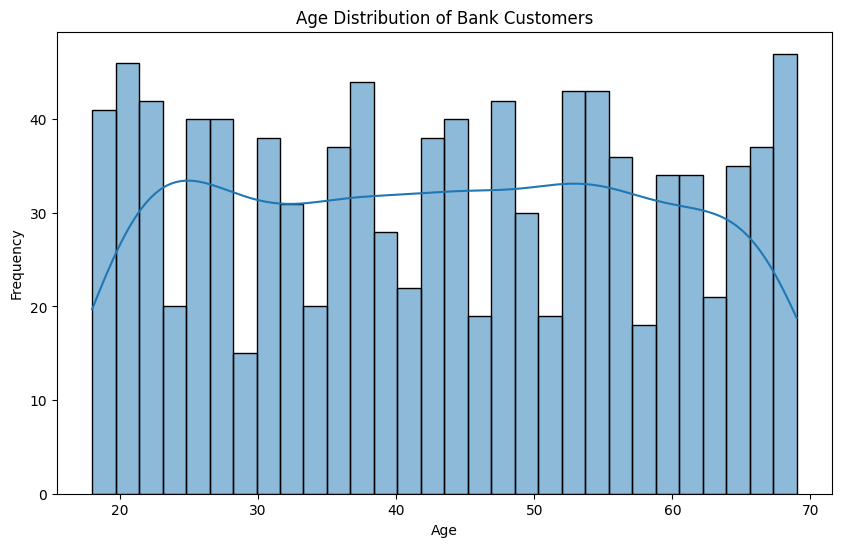

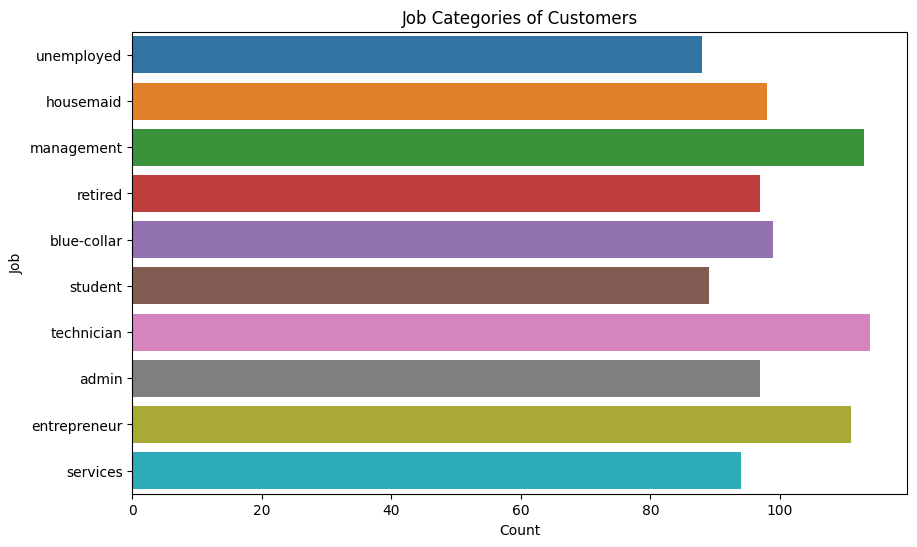

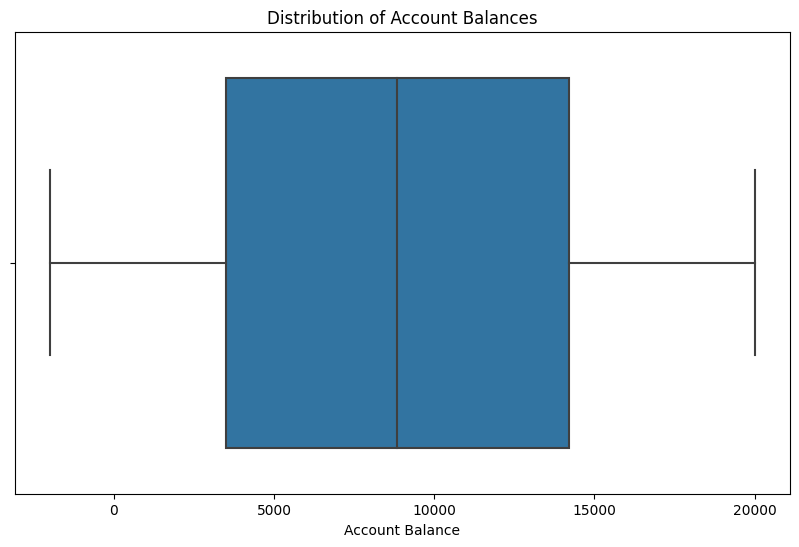

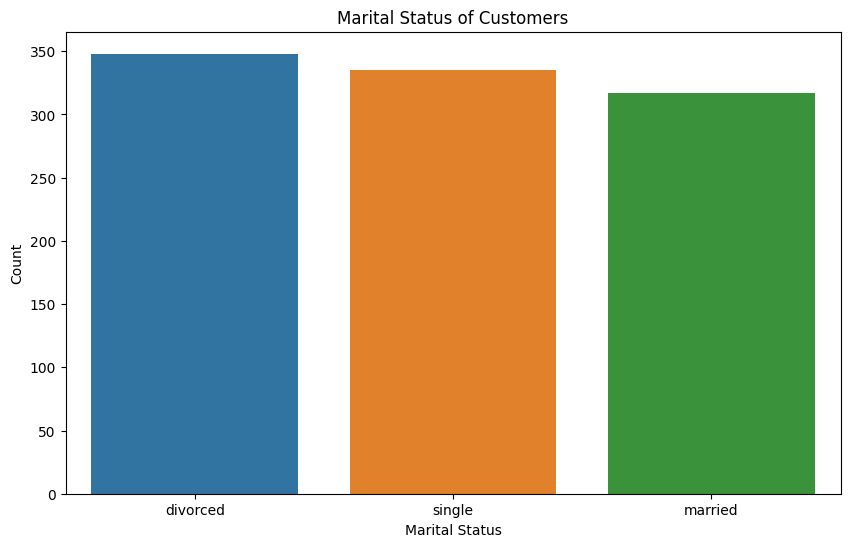

<ipython-input-11-46bc03cfafcb>:35: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


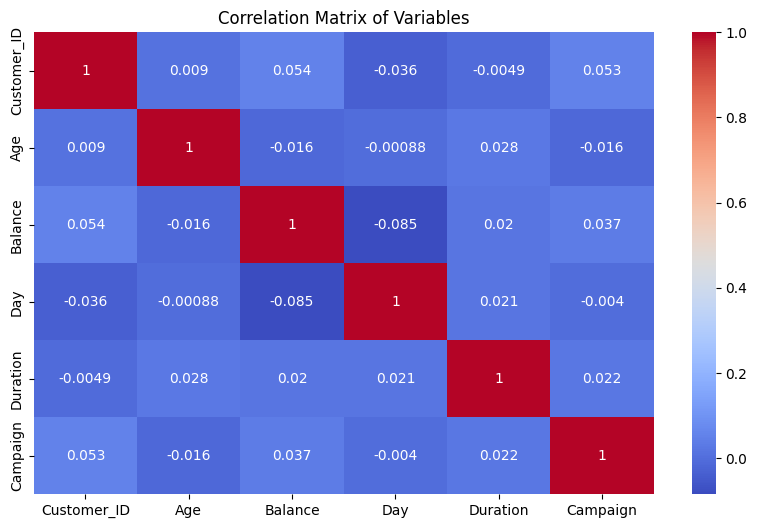

In [ ]:
# Exploratory Data Analysis

# 1. Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution of Bank Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2. Job Categories of Customers
plt.figure(figsize=(10, 6))
sns.countplot(y='Job', data=data)
plt.title('Job Categories of Customers')
plt.xlabel('Count')
plt.ylabel('Job')
plt.show()

# 3. Account Balance Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Balance'])
plt.title('Distribution of Account Balances')
plt.xlabel('Account Balance')
plt.show()

# 4. Marital Status Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital_Status', data=data)
plt.title('Marital Status of Customers')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

# 5. Correlation Matrix
corr_matrix = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Variables')
plt.show()